In [1]:
install.packages("pscl")
library(pscl)
install.packages("coda")
library(coda)

Aktualisiere HTML-Index der Pakete in '.Library'

Making 'packages.html' ...
 fertig

Classes and Methods for R originally developed in the
Political Science Computational Laboratory
Department of Political Science
Stanford University (2002-2015),
by and under the direction of Simon Jackman.
hurdle and zeroinfl functions by Achim Zeileis.

Aktualisiere HTML-Index der Pakete in '.Library'

Making 'packages.html' ...
 fertig



In [2]:
folder_name <- 'Smartvote'
data_name <- 'Binary'

folder_path <- sprintf("../../data/%s", folder_name)
data_path <- sprintf("../../data/%s/%s", folder_name, data_name)

In [3]:
p <- 0
users <- read.csv(sprintf("%s/train_candidates.csv", folder_path), header=TRUE, row.names=1)
reactions <- read.csv(sprintf("%s/train_reactions_%d.csv", data_path, p), header=TRUE, row.names=1)
head(reactions)

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,⋯,X65,X66,X67,X68,X69,X70,X71,X72,X73,X74
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,1,1,1,0,1,1,1,1,⋯,1,1,1,0,0,1,1,0,1,1
1,0,0,0,0,1,0,0,1,0,0,⋯,1,1,0,0,1,1,0,1,1,1
2,1,1,0,0,1,0,0,1,1,0,⋯,1,1,0,0,0,1,0,0,1,0
3,0,0,0,1,1,0,1,0,1,1,⋯,1,1,1,0,0,1,1,0,1,1
4,0,1,1,0,1,0,0,0,1,1,⋯,1,1,1,0,0,1,0,0,0,0
6,1,0,0,1,0,0,0,0,1,1,⋯,1,1,0,0,0,1,0,0,1,0


In [4]:
rollcalls <- rollcall(reactions, legis.data=users['party'])
summary(rollcalls, verbose=TRUE)

by vote...and party loyalty scores



Number of Legislators:		 1622
Number of Roll Call Votes:	 75


Using the following codes to represent roll call votes:
Yea:		 1 
Nay:		 0 
Abstentions:	 NA 
Not In Legislature:	 9 

Party Composition:
  BDP   CVP   FDP Grüne    SP   SVP   glp 
  110   317   233   214   280   225   243 

Vote Summary:
        Count Percent
0 (nay) 55309    45.5
1 (yea) 66341    54.5

Lop-sided Votes (Number Voting in Minority), and Frequencies:
 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
78 79 80 81 
 0  0  0  0 

Summary By Legislator: Counts, Percentages and Party Loyalty
      

In [5]:
IDEAL <- ideal(rollcalls, d=2, store.item=TRUE)

ideal: analysis of roll call data via Markov chain Monte Carlo methods.

normalize option is only meaningful when d=1
Ideal Point Estimation

Number of Legislators		 1622 
Number of Items			 75 


Starting MCMC Iterations...



In [6]:
summary(IDEAL)

Markov chain Monte Carlo Analysis of Roll Call Data
     (multidimensional item-response modeling)     
ideal was called as follows:
ideal(object = rollcalls, d = 2, store.item = TRUE, codes = list(
    yea = 1, nay = 0, notInLegis = 9, missing = NA), dropList = list(
    codes = "notInLegis", lop = 0), maxiter = 10000, thin = 100, 
    burnin = 5000, impute = FALSE, normalize = FALSE, verbose = FALSE)

Number of Legislators:	 1622 
Number of Votes:	 75 
Number of Dimensions:	 2 
Number of Iterations:	 10000 
	Thinned By:	 100 
	Burn-in:	 5000 

Ideal Points (Posterior Means), by Party
                     Mean   2.5%  97.5%
BDP: Dimension 1   -0.267 -0.772  0.348
CVP: Dimension 1   -0.332 -0.863  0.233
FDP: Dimension 1   -0.732 -1.305 -0.134
Grüne: Dimension 1  1.165  0.002  2.226
SP: Dimension 1     1.155  0.191  2.085
SVP: Dimension 1   -1.246 -2.160 -0.518
glp: Dimension 1    0.081 -0.491  0.750
BDP: Dimension 2   -0.152 -1.310  1.047
CVP: Dimension 2   -0.235 -1.068  0.735
FDP: Di

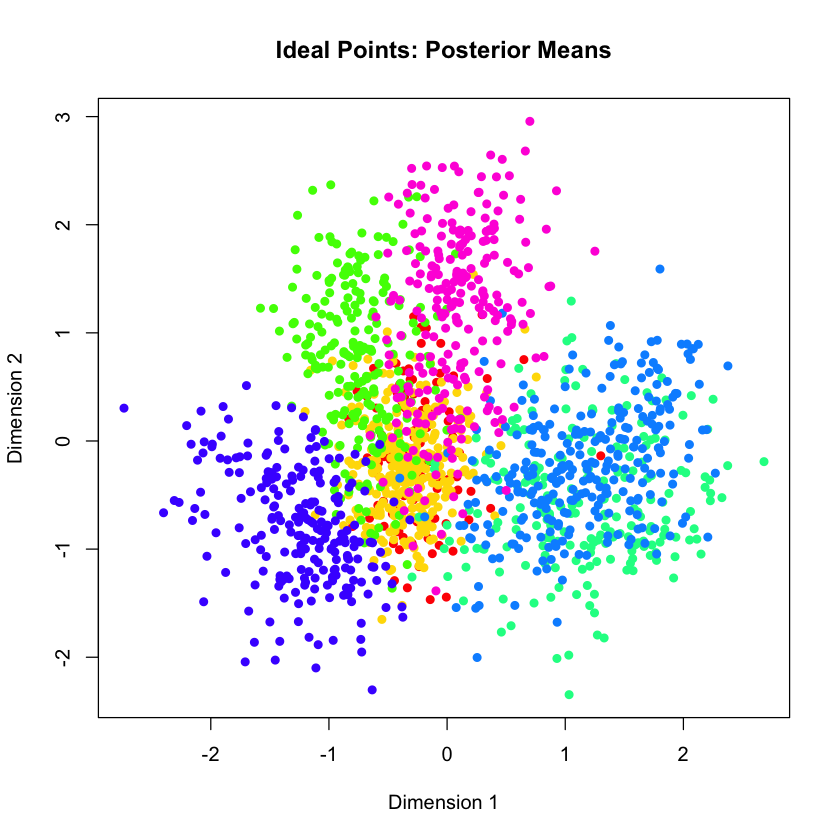

In [7]:
plot(IDEAL)

matching Legislator 267 with Legislator 267 


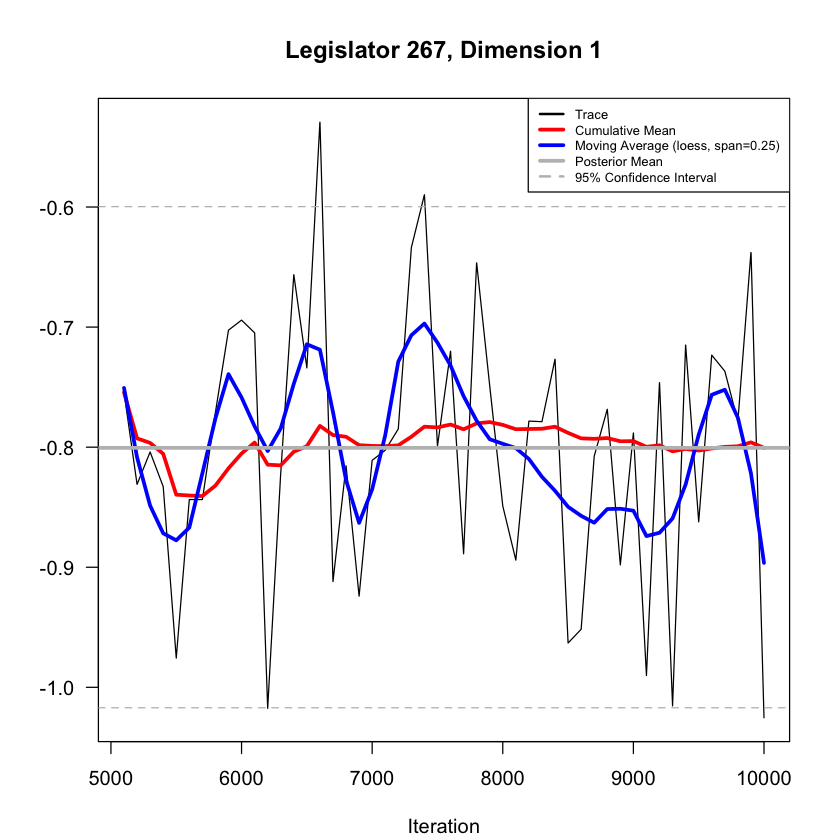

In [8]:
tracex(IDEAL, "Legislator 267")

In [9]:
predictions <- predict(IDEAL)
predictions$overall.percent

predict.ideal: Working with rollcall object rollcalls 

Using posterior means in ideal object.


[1] 82.79573

In [12]:
write.csv(IDEAL$x, sprintf("../../embeddings/IDEAL/%s/check posterior/x_%d.csv", folder_name, p), row.names=TRUE)
write.csv(IDEAL$beta, sprintf("../../embeddings/IDEAL/%s/check posterior/beta_%d.csv", folder_name, p), row.names=TRUE)
write.csv(IDEAL$xbar, sprintf("../../embeddings/IDEAL/%s/check posterior/xbar_%d.csv", folder_name, p), row.names=TRUE)
write.csv(IDEAL$betabar, sprintf("../../embeddings/IDEAL/%s/check posterior/betabar_%d.csv", folder_name, p), row.names=TRUE)


## Fitting the models

In [2]:
runIDEAL <- function(folder_name) {

    folder_path <- sprintf("../../data/%s", folder_name)
    data_path <- sprintf("../../data/%s/%s", folder_name, 'Binary')
    output_path <- sprintf("../../embeddings/IDEAL/%s/", folder_name)

    file_list <- list.files(pattern = "^train_reactions_\\d+\\.csv$", path = data_path)

    if (!file.exists(output_path)) {
    dir.create(output_path, recursive=TRUE)
    }

    # Load Candidates
    users <- read.csv(sprintf("%s/train_candidates.csv", folder_path), header=TRUE, row.names=1)

    # Iterate through the files
    for (file_name in file_list) {
        p <- as.numeric(sub("train_reactions_(\\d+)\\.csv", "\\1", basename(file_name)))
        print(paste("Reading file:", p))
        reactions <- read.csv(sprintf("%s/train_reactions_%d.csv", data_path, p), header=TRUE, row.names=1)
        rollcalls <- rollcall(reactions, legis.data=users['party'])
        IDEAL <- ideal(rollcalls, d=2, store.item=TRUE)        
        write.csv(IDEAL$betabar, sprintf("%s/betabar_%d.csv", output_path, p), row.names=TRUE)
        write.csv(IDEAL$xbar, sprintf("%s/xbar_%d.csv", output_path, p), row.names=TRUE)
    }
}

In [3]:
runIDEAL('Synthetic_60_50')

[1] "Reading file: 0"
ideal: analysis of roll call data via Markov chain Monte Carlo methods.

normalize option is only meaningful when d=1
Ideal Point Estimation

Number of Legislators		 240 
Number of Items			 50 


Starting MCMC Iterations...

[1] "Reading file: 10"
ideal: analysis of roll call data via Markov chain Monte Carlo methods.

normalize option is only meaningful when d=1
Ideal Point Estimation

Number of Legislators		 240 
Number of Items			 50 


Starting MCMC Iterations...

[1] "Reading file: 20"
ideal: analysis of roll call data via Markov chain Monte Carlo methods.

normalize option is only meaningful when d=1
Ideal Point Estimation

Number of Legislators		 240 
Number of Items			 50 


Starting MCMC Iterations...

[1] "Reading file: 30"
ideal: analysis of roll call data via Markov chain Monte Carlo methods.

normalize option is only meaningful when d=1
Ideal Point Estimation

Number of Legislators		 240 
Number of Items			 50 


Starting MCMC Iterations...

[1] "Read

In [4]:
runIDEAL('Smartvote')

[1] "Reading file: 0"
ideal: analysis of roll call data via Markov chain Monte Carlo methods.

normalize option is only meaningful when d=1
Ideal Point Estimation

Number of Legislators		 1622 
Number of Items			 75 


Starting MCMC Iterations...

[1] "Reading file: 10"
ideal: analysis of roll call data via Markov chain Monte Carlo methods.

normalize option is only meaningful when d=1
Ideal Point Estimation

Number of Legislators		 1622 
Number of Items			 75 


Starting MCMC Iterations...

[1] "Reading file: 20"
ideal: analysis of roll call data via Markov chain Monte Carlo methods.

normalize option is only meaningful when d=1
Ideal Point Estimation

Number of Legislators		 1622 
Number of Items			 75 


Starting MCMC Iterations...

[1] "Reading file: 30"
ideal: analysis of roll call data via Markov chain Monte Carlo methods.

normalize option is only meaningful when d=1
Ideal Point Estimation

Number of Legislators		 1622 
Number of Items			 75 


Starting MCMC Iterations...

[1] "

## Contraints

In [ ]:
constraints <- constrain.legis(rollcallobject, 
                               x = list("Legislator 1" = c(-1,0), "Legislator 2"= c(1,0), "Legislator 3"=c(0,-.5)),
                               d=2)
                               
id500Ger <- ideal(rollcallobject,
                  d=2,
                  priors=constraints,
                  store.item=TRUE,
                  maxiter=260E3,
                  burnin=10E3,
                  thin=100)